In [13]:
import json
import yaml
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import unicodedata

In [14]:

# Charger les données depuis entities.json
with open('entities.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


# Charger les règles à partir du fichier tokens.yml
with open('tokens.yml', 'r') as file:
    tokens = yaml.safe_load(file)
    
list_tags=[]
for nom, valeurs in tokens.items():
    list_tags.append(valeurs['start'] )
    
noms_tags = {}
for tag in list_tags:
    nom_tag_p = None
    for nom, valeurs in tokens.items():
        if valeurs['start'] == tag:
            nom_tag_p = nom
    noms_tags.update({tag: nom_tag_p})
   

# Nettoyer le texte en supprimant les caractères spéciaux, les balises, etc.
def clean_text(text):
    #on enleve pas les majuscules car on suppose que c'est une information importante pour tagguer (Noms)
    # Supprimer les caractères spéciaux et les balises saufs celles de list_tags
    clean_text = re.sub(r'[^\w\s' + re.escape(''.join(list_tags)) + ']', '', text)
    return clean_text

# Normaliser le texte en le mettant en minuscules, en supprimant les accents, etc.
def normalize_text(text):
    # Supprimer les accents
    normalized_text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    return normalized_text


# Appliquer les fonctions clean_text et normalize_text à chaque élément de data
data = {key: normalize_text(clean_text(value)) for key, value in data.items()}


# Afficher le nombre d'entrées dans le fichier entities.json
print("Nombre d'entrées dans le fichier entities.json:", len(data))

# Afficher le nombre d'entrées dans le fichier entities.json
print("Nombre de tags :", len(tokens))

data_lines = []
# Afficher quelques exemples de données
#print("\nExemples de données :")
for key, value in data.items():
    liste_elements = value.split("\n")
    data_lines.append(liste_elements)
   # print(key, ":", value[:10])  # Afficher seulement les premiers 100 caractères pour des exemples concis
    
data_lines = [element for sous_liste in data_lines for element in sous_liste]
print("Nombre de lignes dans tous les documents au total :", len(data_lines))


Nombre d'entrées dans le fichier entities.json: 1218
Nombre de tags : 14
Nombre de lignes dans tous les documents au total : 25448


In [15]:



#Construction d'une expression régulière pour rechercher les motifs correspondants à un espace suivi d'un tag
pattern = "|".join(["\s(?={})".format(re.escape(tag)) for tag in list_tags])

     
# Compter le nombre d'occurrences de chaque tag
comptes_tags = {}
for sublist in data_lines:
    print(sublist)
    words =re.split(pattern, sublist)
    for word in words:
        #print(word)
        if (prefix for prefix in list_tags if tag.startswith(word)):
            if len(word)==0:
                break
            if word[0] in comptes_tags:
                comptes_tags[word[0]] += 1
            else:
                comptes_tags[word[0]] = 1


 


ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarcon Ⓚfrancaise
ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarcon ⓀPiemontaise
ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarcon ⓀPiemontaise
ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marie Ⓚfrancaise
ⓄVignat ⒻZelie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrancaise
ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrancaise
ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrancaise
ⓅDesbroper ⒻFrancois Jules Ⓜaumonier du college Ⓐ46 ⒸGarcon Ⓚfrancaise
ⓄApelmeau ⒻTherese Ⓜdomestique Ⓐ49 ⒸFemme mariee Ⓚfrancaise
Ⓟde Chaumont Ⓐ40 ⒸHomme marie Ⓚfrancaise
Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariee Ⓚfrancaise
Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarcon Ⓚfrancaise
Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarcon Ⓚfrancaise
Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarcon Ⓚfrancaise
ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrancaise
ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marie Ⓚfrancaise
ⓄDutertre ⒻAdele Ⓜouvriere Ⓗsa femme Ⓐ45 ⒸFemme mariee Ⓚfrancaise
ⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme marie Ⓚfrancaise
ⓄS

In [16]:

# Initialiser un dictionnaire pour stocker les mots par tag
data_dict = {tag: [] for tag in list_tags}
comptes_dict = {tag: 0 for tag in list_tags}


# Remplir le dictionnaire avec les mots correspondants à chaque tag
for sublist in data_lines:
    #print(sublist)
    
    comptes_dict = {tag: 0 for tag in list_tags}
    for word in re.split(pattern, sublist):
        for tag in list_tags:
            #print(tag, word)
            if word.startswith(tag):
                comptes_dict[tag]=1
                #print("if")
                data_dict[tag].append(word[1:])
      
    for tag in list_tags:
        if comptes_dict[tag]==0:
            data_dict[tag].append("")
                    

# Créer un DataFrame à partir du dictionnaire
df = pd.DataFrame(data_dict)

df.rename(columns=noms_tags, inplace=True)
#df.replace("", np.nan, inplace=True)


In [17]:
# Créer des tableaux vides pour stocker les textes et les tags
texts = []
tags = []

# Parcourir chaque ligne du DataFrame
for _, row in df.iterrows():
    # Initialiser des listes temporaires pour stocker les textes et les tags de la ligne actuelle
    row_texts = []
    row_tags = []
    
    # Parcourir chaque élément de la ligne
    for col, value in row.items():
        # Ignorer les valeurs vides
        if pd.notna(value) and value != '':
            # Ajouter le texte et le tag correspondants aux listes temporaires
            row_texts.append(value)
            row_tags.append(col)
    
    # Ajouter les listes temporaires aux tableaux principaux
    texts.append(row_texts)
    tags.append(row_tags)

# Afficher les tableaux de textes et de tags
print(texts[0], tags[0])

['25', 'Garcon', 'Cyrille', 'francaise', 'menuisier', 'Breton'] ['age', 'civil_status', 'firstname', 'nationality', 'occupation', 'surname']


In [18]:
df

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household
0,25,,Garcon,,,Cyrille,,,,francaise,,menuisier,Breton,
1,30,,Garcon,,,Auguste,,,,Piemontaise,,vitrier,,Ferazzi
2,24,,Garcon,,,Pierre,,,,Piemontaise,,vitrier,,Machol
3,48,,Homme marie,,,Alexandre,,,,francaise,,prop re,,Desbois
4,30,,,,,Zelie,sa fe,,,francaise,,prop re,Vignat,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25443,,1887,,,,Annunziata,epouse,idem,,idem,,,BerniLaureti,
25444,,1914,,,,Primo,fils,idem,,idem,,,Berni,
25445,,,,,,,,,,,,,,
25446,,,,,,,,,,,,,,


In [19]:
df.describe()

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household
count,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448
unique,249,159,7,1,1075,2374,889,2890,1,71,308,1960,8025,4105
top,,,,,,Marie,,,,,,,,
freq,9012,18104,14743,25448,22538,2758,4712,16216,25448,12134,24852,9270,6290,19808


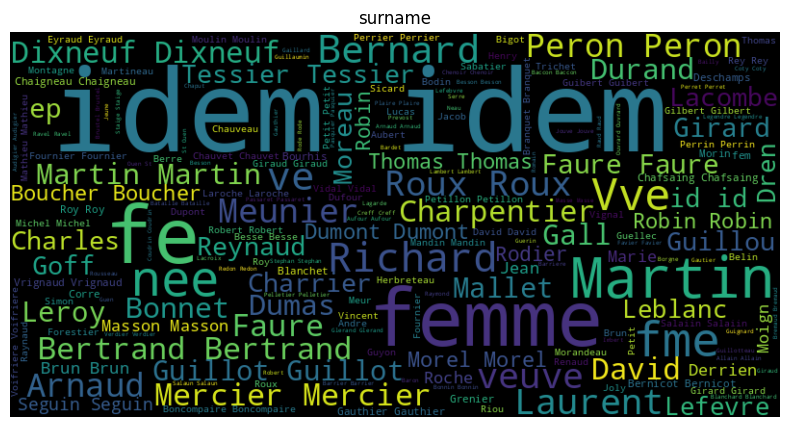

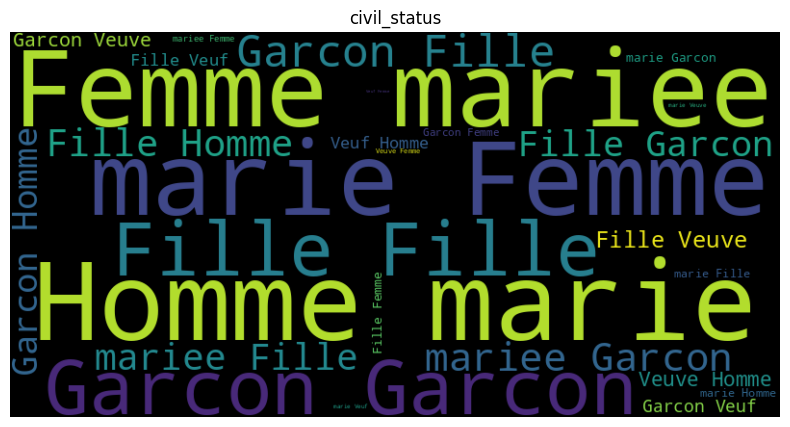

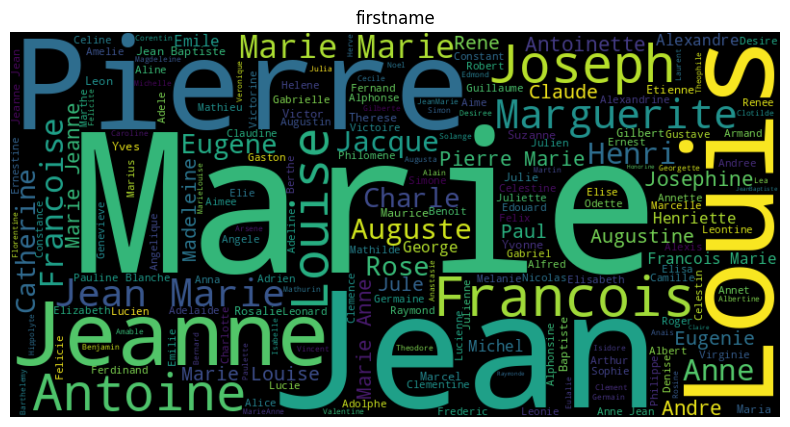

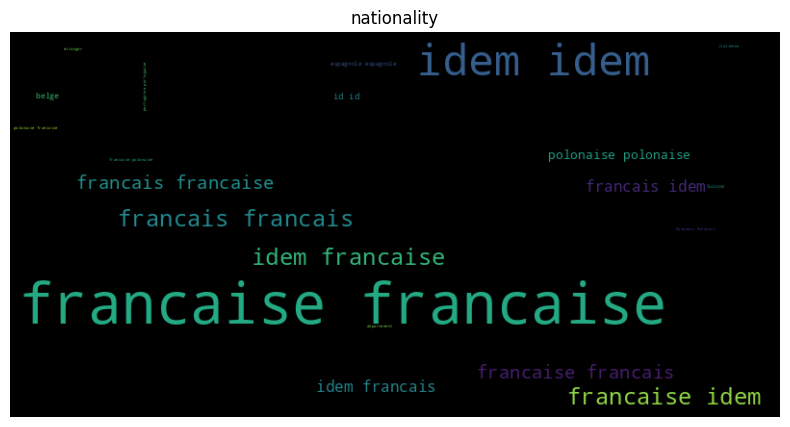

In [20]:
# Display one wordcloud for each of the most frequent classes
STOPWORDS = [x.strip() for x in open('stop_word_fr.txt').readlines()]

# plot a word cloud for each category
for cat in ['surname', 'civil_status',  'firstname','nationality']:
    wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(df[cat].to_string())
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cat)
    plt.axis('off')
    plt.show()

## Model 

In [21]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_tags, val_tags = train_test_split(texts, tags, test_size=.2)

In [22]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [23]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')
train_encodings = tokenizer(train_texts, is_split_into_words=True, return_offsets_mapping=True, padding=True, truncation=True)
val_encodings = tokenizer(val_texts, is_split_into_words=True, return_offsets_mapping=True, padding=True, truncation=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
import numpy as np

def encode_tags(tags, encodings):
    labels = [[tag2id[tag] for tag in doc] for doc in tags]
    encoded_labels = []
    for doc_labels, doc_offset in zip(labels, encodings.offset_mapping):
        # create an empty array of -100
        doc_enc_labels = np.ones(len(doc_offset),dtype=int) * -1
        arr_offset = np.array(doc_offset)
        
        if doc_enc_labels[(arr_offset[:,0] == 0) & (arr_offset[:,1] != 0)].shape[0]!=len(doc_labels):
            doc_enc_labels[(arr_offset[:,0] == 0) & (arr_offset[:,1] != 0)] = doc_labels[:len(doc_enc_labels[(arr_offset[:,0] == 0) & (arr_offset[:,1] != 0)])]
            encoded_labels.append(doc_enc_labels.tolist())
        else:
            # set labels whose first offset position is 0 and the second is not 0
            doc_enc_labels[(arr_offset[:,0] == 0) & (arr_offset[:,1] != 0)] = doc_labels
            encoded_labels.append(doc_enc_labels.tolist())

    return encoded_labels

train_labels = encode_tags(train_tags, train_encodings)
val_labels = encode_tags(val_tags, val_encodings)

In [25]:
import torch

class WNUTDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_encodings.pop("offset_mapping") # we don't want to pass this to the model
val_encodings.pop("offset_mapping")
train_dataset = WNUTDataset(train_encodings, train_labels)
val_dataset = WNUTDataset(val_encodings, val_labels)

In [26]:
from transformers import DistilBertForTokenClassification
model = DistilBertForTokenClassification.from_pretrained('distilbert-base-cased', num_labels=len(unique_tags))

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
pip install accelerate -U

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [28]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(device)
model.train()

train_loader = DataLoader(train_dataset, batch_size=1120, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):
    print(epoch)
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        loss.backward()
        optim.step()

model.eval()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


0
